In [53]:
import json
import glob
import pandas as pd
import sqlite3
import os
import numpy as np

def load_spotify_data():
    path = "/Users/andrewedwards/Desktop/spotify-history"
    files = glob.glob(os.path.join(path, "Streaming_History_Audio_*.json"))
    
    all_data = []
    for file_path in files:
        with open(file_path, 'r') as file:
            data = json.load(file)
            all_data.extend(data)
    
    df = pd.DataFrame(all_data)
    df['ts'] = pd.to_datetime(df['ts'])
    df['year'] = df['ts'].dt.year
    df['month'] = df['ts'].dt.month
    df['day'] = df['ts'].dt.day
    df['hour'] = df['ts'].dt.hour
    df['minutes_played'] = df['ms_played'] / 60000
    
    return df

df = load_spotify_data()
conn = sqlite3.connect('spotify_history.db')
df.to_sql('listening_history', conn, if_exists='replace', index=False)
conn.close()

print("Database created successfully!")

Database created successfully!


In [54]:
conn = sqlite3.connect('spotify_history.db')
query = """
SELECT 
    master_metadata_album_artist_name as artist,
    COUNT(*) as play_count,
    SUM(minutes_played) as total_minutes
FROM listening_history
GROUP BY artist
ORDER BY play_count DESC
LIMIT 10
"""
pd.read_sql_query(query, conn)

,artist,play_count,total_minutes
0,Radiohead,10839,16143.251250
1,The Strokes,7890,11374.665733
2,Modest Mouse,5997,7296.622850
3,Ratatat,5111,4313.340283
4,The Shins,4032,2958.135517
5,Passion Pit,4023,2932.948533
6,Death Cab for Cutie,3799,3844.451000
7,Bright Eyes,3610,3208.052300
8,Vampire Weekend,3249,2135.794300
9,The Beatles,3032,1419.200650


In [15]:
conn = sqlite3.connect('spotify_history.db')

query = """
WITH artist_stats AS (
    SELECT 
        master_metadata_album_artist_name as artist,
        master_metadata_track_name as track,
        COUNT(*) as play_count,
        SUM(minutes_played) as total_minutes,
        AVG(minutes_played) as avg_minutes
    FROM listening_history
    WHERE master_metadata_album_artist_name IS NOT NULL
    GROUP BY artist, track
)
SELECT 
    artist,
    track,
    play_count,
    ROUND(total_minutes, 2) as total_minutes,
    ROUND(avg_minutes, 2) as avg_minutes
FROM artist_stats
ORDER BY play_count DESC
LIMIT 20;
"""

pd.read_sql_query(query, conn)

,artist,track,play_count,total_minutes,avg_minutes
0,American Football,Never Meant,298,752.03,2.52
1,Radiohead,Let Down,289,768.91,2.66
2,Brand New,The Quiet Things That No One Ever Knows,284,704.08,2.48
3,Brand New,Jesus Christ,283,841.75,2.97
4,Green Day,She,283,414.43,1.46
5,blink-182,Dumpweed,283,353.60,1.25
6,Animal Collective,Summertime Clothes,276,456.53,1.65
7,Silversun Pickups,Lazy Eye,269,522.11,1.94
8,The Smashing Pumpkins,1979 - Remastered 2012,269,577.21,2.15
9,Passion Pit,Moth's Wings,265,560.75,2.12


In [16]:
conn = sqlite3.connect('spotify_history.db')

query = """
WITH artist_stats AS (
    SELECT 
        master_metadata_album_artist_name as artist,
        master_metadata_track_name as track,
        COUNT(*) as play_count,
        SUM(minutes_played) as total_minutes,
        AVG(minutes_played) as avg_minutes
    FROM listening_history
    WHERE master_metadata_album_artist_name IS NOT NULL
    GROUP BY artist, track
)
SELECT 
    artist,
    track,
    play_count,
    ROUND(total_minutes, 2) as total_minutes,
    ROUND(avg_minutes, 2) as avg_minutes
FROM artist_stats
ORDER BY total_minutes DESC
LIMIT 20;
"""

pd.read_sql_query(query, conn)

,artist,track,play_count,total_minutes,avg_minutes
0,Radiohead,House Of Cards,250,899.62,3.60
1,Brand New,Jesus Christ,283,841.75,2.97
2,Jank,Versace Summer,240,838.51,3.49
3,Brand New,Degausser,222,821.25,3.70
4,Radiohead,Let Down,289,768.91,2.66
5,American Football,Never Meant,298,752.03,2.52
6,MGMT,Love Always Remains,247,740.09,3.00
7,Moose Blood,Knuckles,221,716.01,3.24
8,Brand New,The Quiet Things That No One Ever Knows,284,704.08,2.48
9,Origami Angel,The Air Up Here,180,685.21,3.81


In [20]:
query = """
SELECT 
   year,
   COUNT(*) as total_streams,
   ROUND(SUM(minutes_played), 2) as total_minutes,
   COUNT(DISTINCT master_metadata_album_artist_name) as unique_artists,
   COUNT(DISTINCT master_metadata_track_name) as unique_tracks
FROM listening_history
GROUP BY year 
ORDER BY total_streams DESC limit 10;
"""

pd.read_sql_query(query, conn)

,year,total_streams,total_minutes,unique_artists,unique_tracks
0,2017,41389,32412.52,839,3722
1,2016,39224,39608.79,543,2408
2,2021,29181,37834.24,1374,4407
3,2019,26978,35383.86,988,3876
4,2020,26929,59823.42,1463,5435
5,2022,23958,44424.30,1370,4986
6,2018,23938,19936.74,732,3182
7,2023,23722,53981.04,1259,5190
8,2024,21607,38119.44,1439,5154
9,2015,14531,15036.24,342,1596


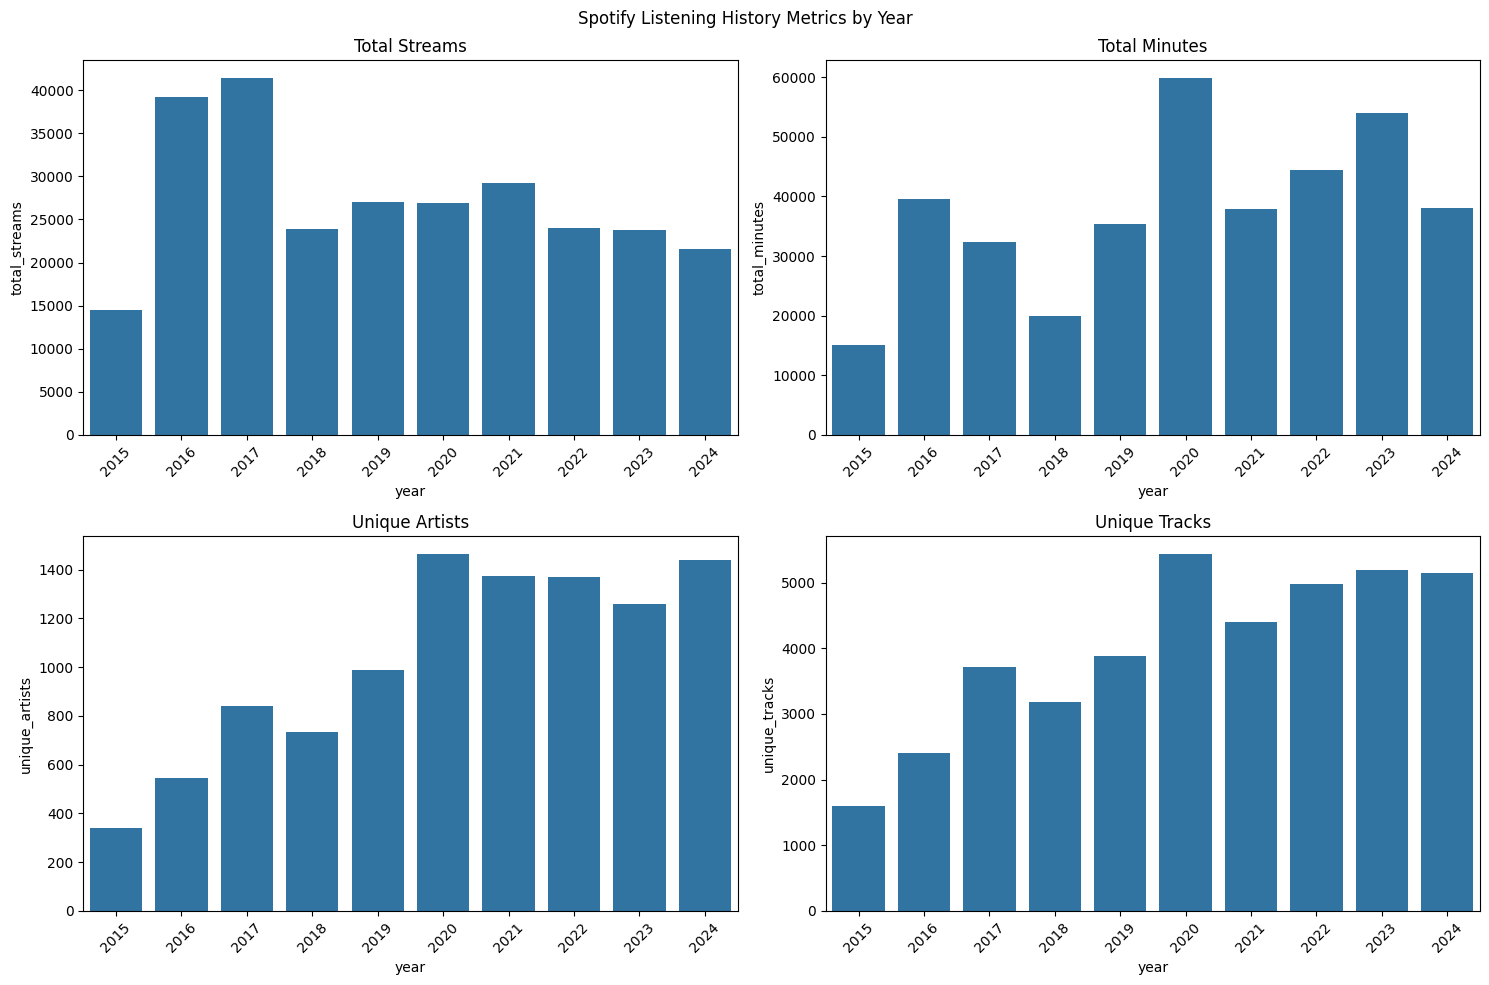

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

query = """
SELECT year, total_streams, total_minutes, unique_artists, unique_tracks
FROM (
   SELECT 
       year,
       COUNT(*) as total_streams,
       ROUND(SUM(minutes_played), 2) as total_minutes,
       COUNT(DISTINCT master_metadata_album_artist_name) as unique_artists,
       COUNT(DISTINCT master_metadata_track_name) as unique_tracks
   FROM listening_history
   WHERE year > 2013 AND year < 2025
   GROUP BY year
) data
ORDER BY year;
"""

df = pd.read_sql_query(query, conn)

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Spotify Listening History Metrics by Year')

metrics = ['total_streams', 'total_minutes', 'unique_artists', 'unique_tracks']
for i, metric in enumerate(metrics):
   ax = axes[i//2, i%2]
   sns.barplot(data=df, x='year', y=metric, ax=ax)
   ax.set_title(metric.replace('_', ' ').title())
   ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

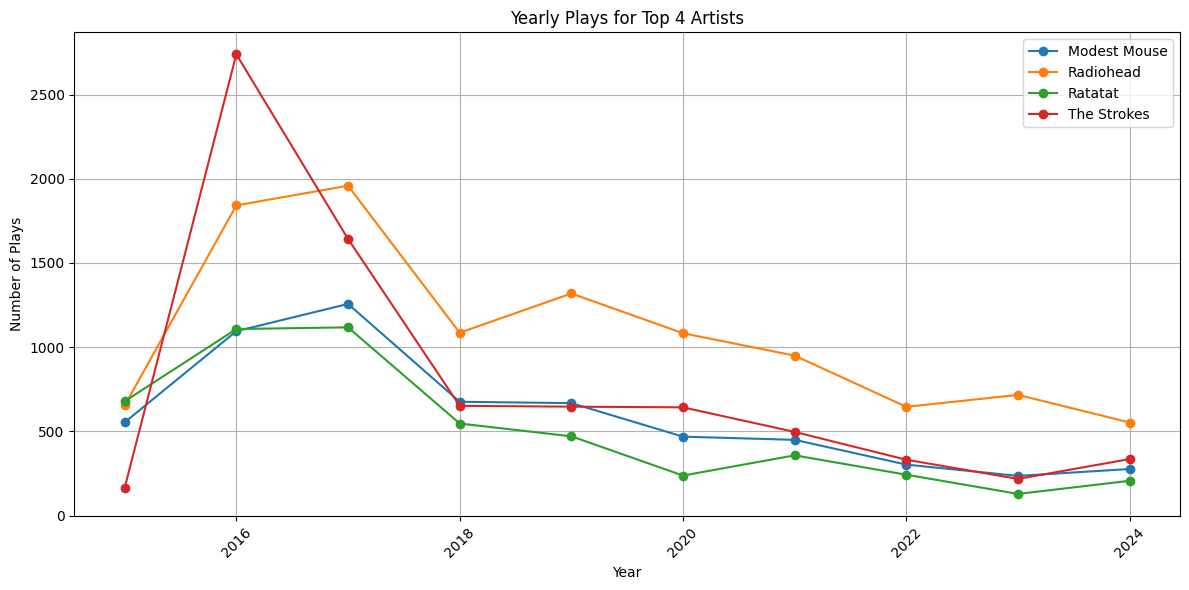

In [29]:
query = """
WITH artist_counts AS (
   SELECT 
       year,
       master_metadata_album_artist_name,
       COUNT(*) as plays
   FROM listening_history 
   WHERE year > 2013 AND year < 2025
   GROUP BY year, master_metadata_album_artist_name
)
SELECT year, master_metadata_album_artist_name, plays
FROM artist_counts
WHERE master_metadata_album_artist_name IN (
   SELECT master_metadata_album_artist_name 
   FROM listening_history
   GROUP BY master_metadata_album_artist_name
   ORDER BY COUNT(*) DESC
   LIMIT 4
)
ORDER BY year;
"""

df = pd.read_sql_query(query, conn)

plt.figure(figsize=(12, 6))
for artist in df['master_metadata_album_artist_name'].unique():
   artist_data = df[df['master_metadata_album_artist_name'] == artist]
   plt.plot(artist_data['year'], artist_data['plays'], marker='o', label=artist)

plt.title('Yearly Plays for Top 4 Artists')
plt.xlabel('Year')
plt.ylabel('Number of Plays')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

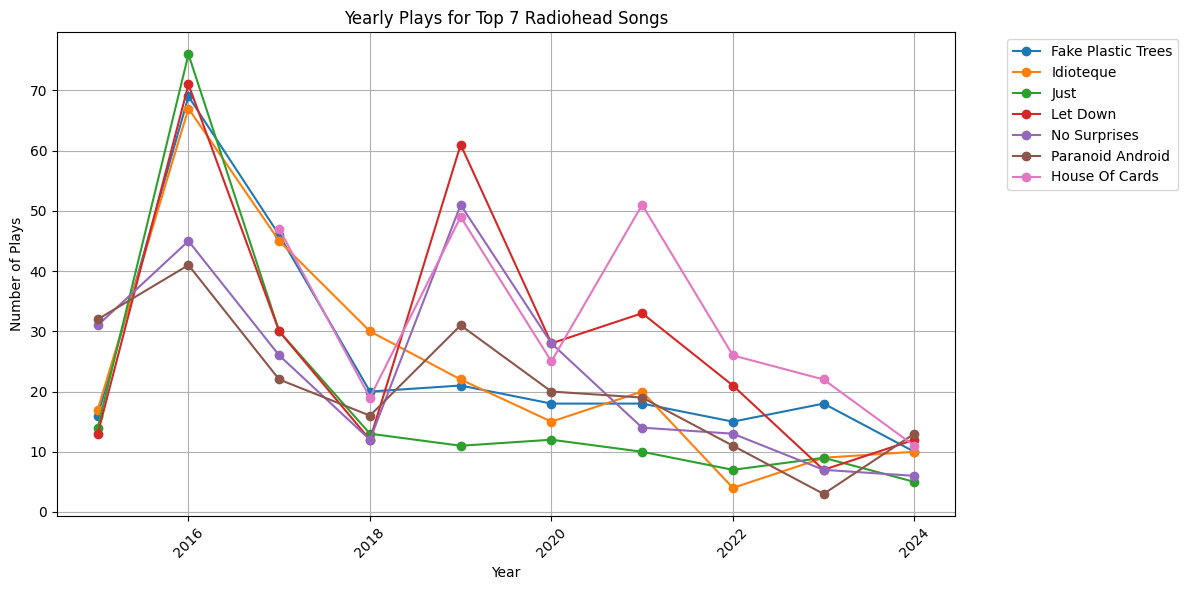

In [31]:
query = """
SELECT 
   master_metadata_track_name,
   year,
   COUNT(*) as plays
FROM listening_history 
WHERE master_metadata_album_artist_name = 'Radiohead'
   AND year > 2013 AND year < 2025
GROUP BY master_metadata_track_name, year
HAVING master_metadata_track_name IN (
   SELECT master_metadata_track_name
   FROM listening_history
   WHERE master_metadata_album_artist_name = 'Radiohead'
   GROUP BY master_metadata_track_name
   ORDER BY COUNT(*) DESC
   LIMIT 7
)
ORDER BY year;
"""

df = pd.read_sql_query(query, conn)

plt.figure(figsize=(12, 6))
for song in df['master_metadata_track_name'].unique():
   song_data = df[df['master_metadata_track_name'] == song]
   plt.plot(song_data['year'], song_data['plays'], marker='o', label=song)

plt.title('Yearly Plays for Top 7 Radiohead Songs')
plt.xlabel('Year')
plt.ylabel('Number of Plays')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

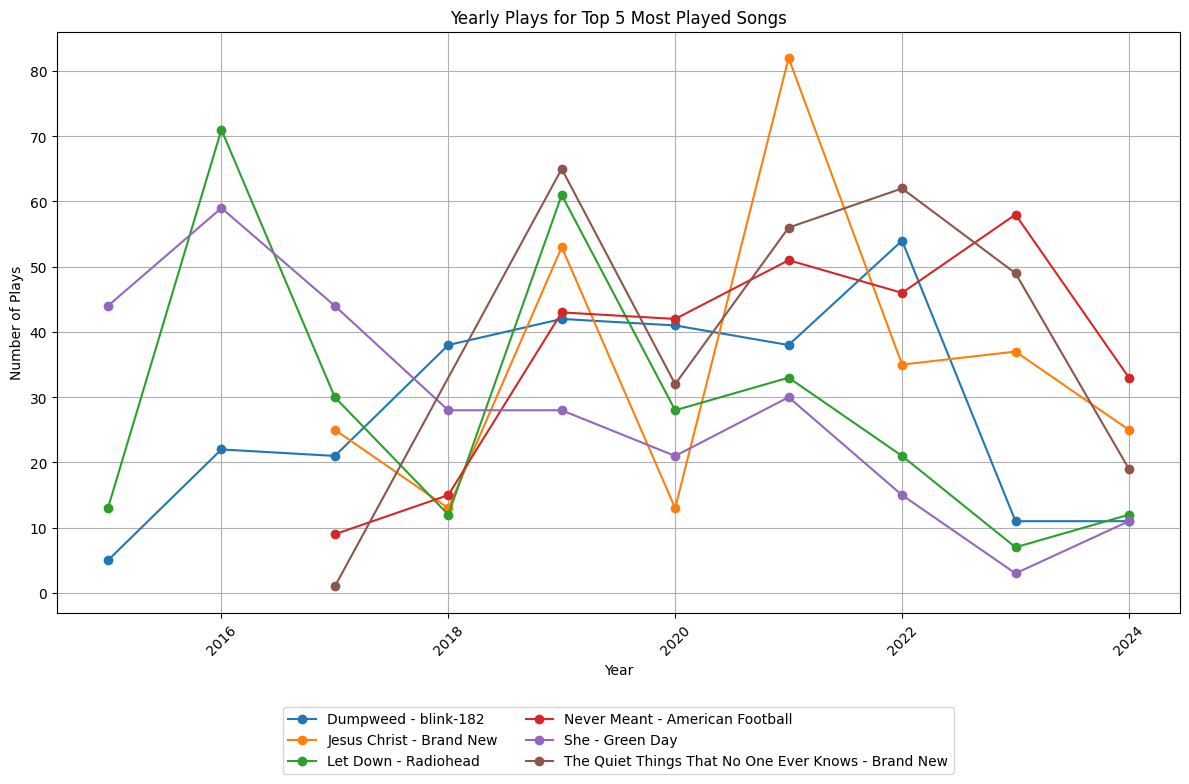

In [34]:
query = """
WITH top_songs AS (
   SELECT 
       master_metadata_track_name as track,
       master_metadata_album_artist_name as artist,
       year,
       COUNT(*) as plays
   FROM listening_history 
   WHERE year > 2013 AND year < 2025
   GROUP BY track, artist, year
   HAVING (track, artist) IN (
       SELECT 
           master_metadata_track_name,
           master_metadata_album_artist_name
       FROM listening_history
       GROUP BY master_metadata_track_name, master_metadata_album_artist_name
       ORDER BY COUNT(*) DESC
       LIMIT 7
   )
)
SELECT * FROM top_songs
ORDER BY year;
"""

df = pd.read_sql_query(query, conn)

plt.figure(figsize=(12, 8))  # Increased height to accommodate legend
for song in df.groupby(['track', 'artist']):
   song_data = song[1]
   label = f"{song[0][0]} - {song[0][1]}"
   plt.plot(song_data['year'], song_data['plays'], marker='o', label=label)

plt.title('Yearly Plays for Top 5 Most Played Songs')
plt.xlabel('Year')
plt.ylabel('Number of Plays')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

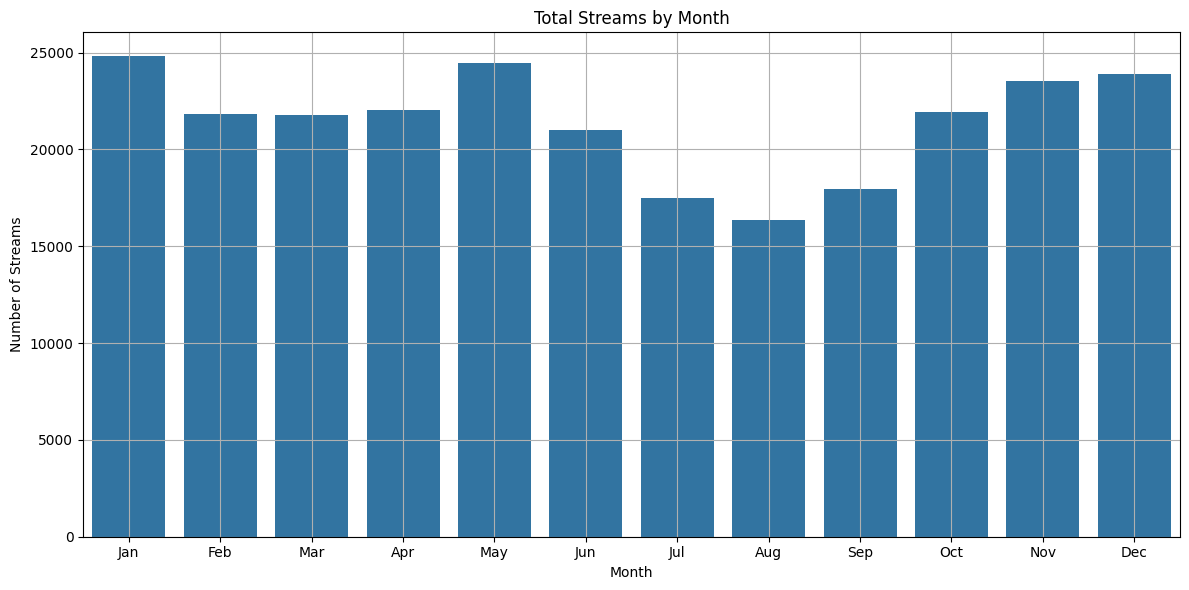

In [68]:
query = """
SELECT 
   month,
   COUNT(*) as total_streams
FROM listening_history
WHERE year > 2015 AND year < 2025
GROUP BY month
ORDER BY month;
"""

df = pd.read_sql_query(query, conn)

# Add month names
month_names = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 
              7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
df['month_name'] = df['month'].map(month_names)

plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='month_name', y='total_streams')
plt.title('Total Streams by Month')
plt.xlabel('Month')
plt.ylabel('Number of Streams')
plt.grid(True)
plt.tight_layout()
plt.show()

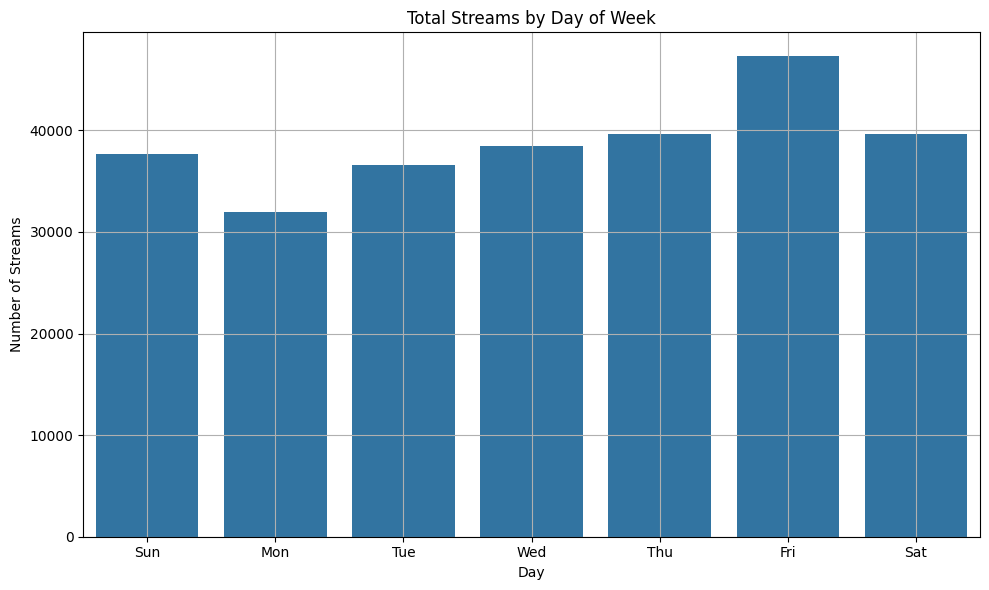

In [36]:
query = """
SELECT 
   CAST(strftime('%w', ts) AS INTEGER) as day_num,
   COUNT(*) as total_streams
FROM listening_history
WHERE year > 2013 AND year < 2025
GROUP BY day_num
ORDER BY day_num;
"""

df = pd.read_sql_query(query, conn)

day_names = {0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat'}
df['day_name'] = df['day_num'].map(day_names)

plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='day_name', y='total_streams')
plt.title('Total Streams by Day of Week')
plt.xlabel('Day')
plt.ylabel('Number of Streams')
plt.grid(True)
plt.tight_layout()
plt.show()

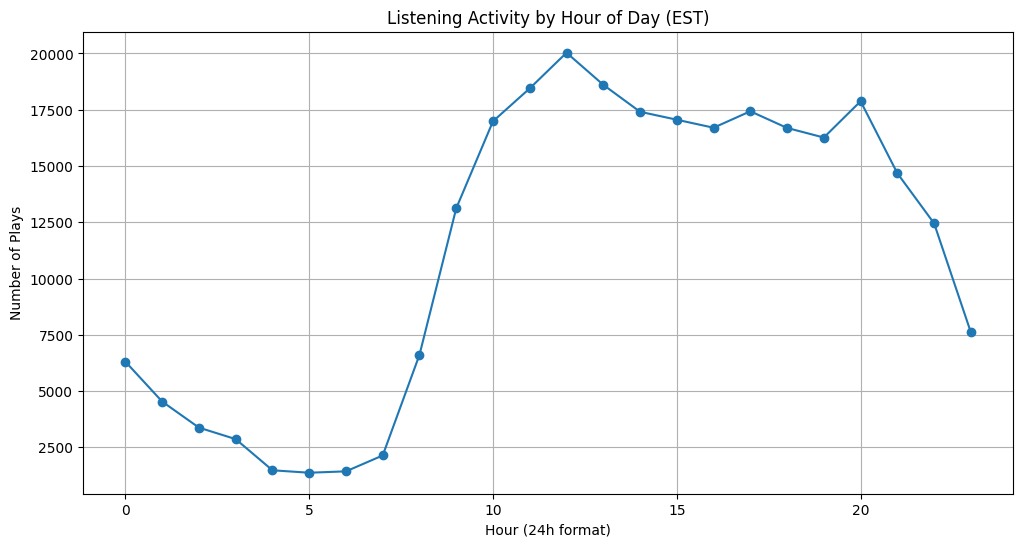

In [66]:
query = """
SELECT 
   CAST(strftime('%H', datetime(ts, '-5 hours')) AS INTEGER) as hour,
   COUNT(*) as plays,
   ROUND(SUM(minutes_played),2) as total_minutes
FROM listening_history
WHERE year > 2013 AND year < 2025
GROUP BY hour
ORDER BY hour;
"""

df = pd.read_sql_query(query, conn)
plt.figure(figsize=(12, 6))
plt.plot(df['hour'], df['plays'], marker='o')
plt.title('Listening Activity by Hour of Day (EST)')
plt.xlabel('Hour (24h format)')
plt.ylabel('Number of Plays')
plt.grid(True)
plt.show()

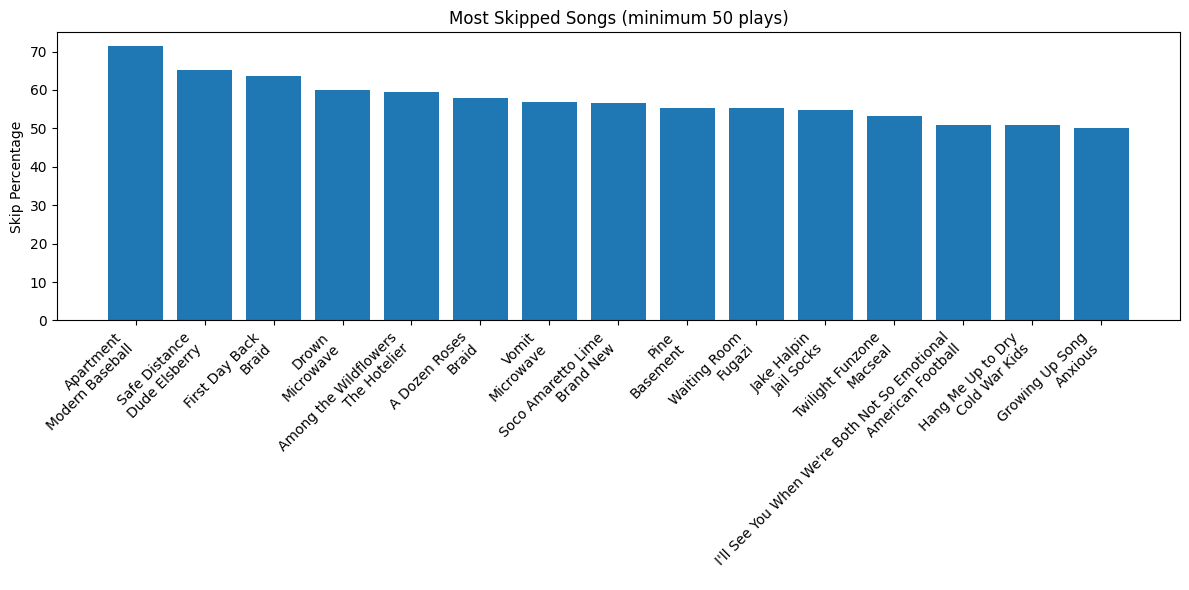

In [41]:
query = """
SELECT 
   master_metadata_track_name as track,
   master_metadata_album_artist_name as artist,
   COUNT(*) as total_plays,
   SUM(CASE WHEN skipped = 1 THEN 1 ELSE 0 END) as skips,
   ROUND(CAST(SUM(CASE WHEN skipped = 1 THEN 1 ELSE 0 END) AS FLOAT) / COUNT(*) * 100, 2) as skip_percentage
FROM listening_history
GROUP BY track, artist
HAVING total_plays > 50
ORDER BY skip_percentage DESC
LIMIT 15;
"""

df = pd.read_sql_query(query, conn)

plt.figure(figsize=(12, 6))
bars = plt.bar(range(len(df)), df['skip_percentage'])
plt.xticks(range(len(df)), [f"{df['track'].iloc[i]}\n{df['artist'].iloc[i]}" for i in range(len(df))], rotation=45, ha='right')
plt.title('Most Skipped Songs (minimum 50 plays)')
plt.ylabel('Skip Percentage')
plt.tight_layout()
plt.show()

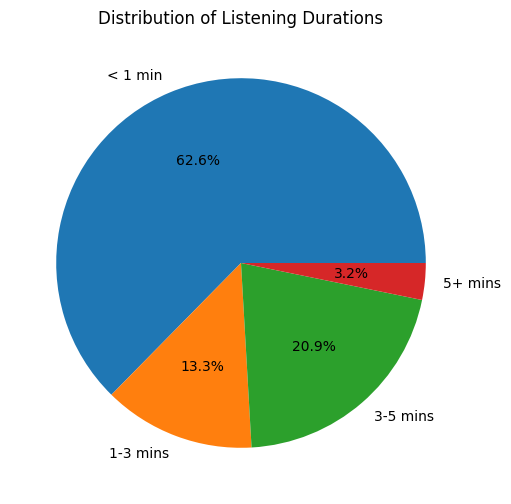

In [42]:
query = """
SELECT 
   CASE 
       WHEN minutes_played < 1 THEN '< 1 min'
       WHEN minutes_played < 3 THEN '1-3 mins'
       WHEN minutes_played < 5 THEN '3-5 mins'
       ELSE '5+ mins'
   END as duration_bucket,
   COUNT(*) as count
FROM listening_history
GROUP BY duration_bucket
ORDER BY 
   CASE duration_bucket
       WHEN '< 1 min' THEN 1
       WHEN '1-3 mins' THEN 2
       WHEN '3-5 mins' THEN 3
       ELSE 4
   END;
"""

df = pd.read_sql_query(query, conn)

plt.figure(figsize=(10, 6))
plt.pie(df['count'], labels=df['duration_bucket'], autopct='%1.1f%%')
plt.title('Distribution of Listening Durations')
plt.show()

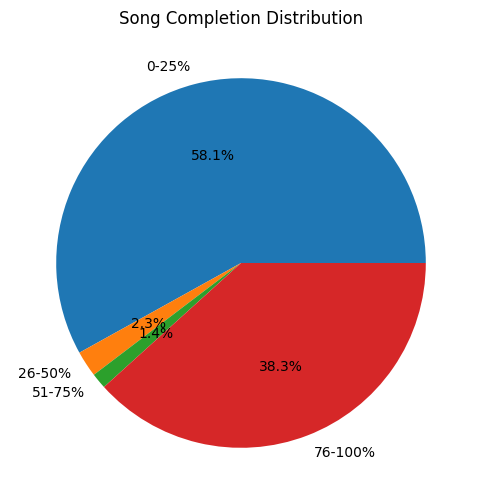

In [43]:
query = """
SELECT 
   CASE 
       WHEN CAST(ms_played AS FLOAT) / 60000 <= 0.25 THEN '0-25%'
       WHEN CAST(ms_played AS FLOAT) / 60000 <= 0.50 THEN '26-50%'
       WHEN CAST(ms_played AS FLOAT) / 60000 <= 0.75 THEN '51-75%'
       ELSE '76-100%'
   END as completion_bucket,
   COUNT(*) as count
FROM listening_history
WHERE master_metadata_track_name IS NOT NULL
   AND year > 2013 AND year < 2025
GROUP BY completion_bucket
ORDER BY completion_bucket;
"""

df = pd.read_sql_query(query, conn)

plt.figure(figsize=(10, 6))
plt.pie(df['count'], labels=df['completion_bucket'], autopct='%1.1f%%')
plt.title('Song Completion Distribution')
plt.show()

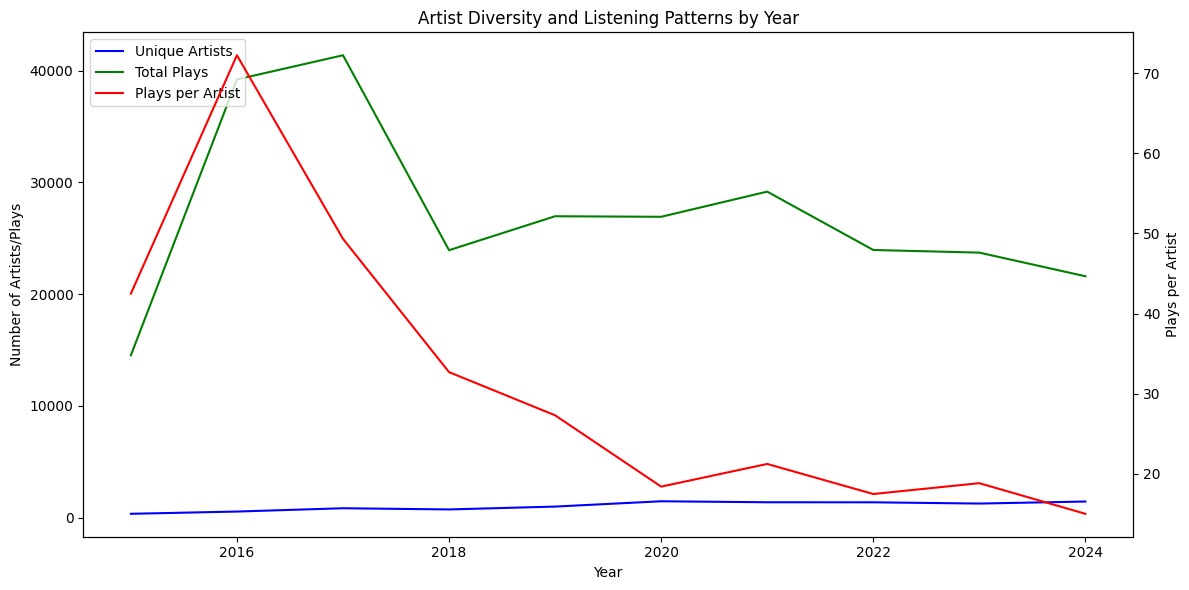

In [44]:
query = """
SELECT 
   year,
   COUNT(DISTINCT master_metadata_album_artist_name) as unique_artists,
   COUNT(*) as total_plays,
   ROUND(CAST(COUNT(*) AS FLOAT) / COUNT(DISTINCT master_metadata_album_artist_name), 2) as plays_per_artist
FROM listening_history
WHERE year > 2013 AND year < 2025
GROUP BY year
ORDER BY year;
"""

df = pd.read_sql_query(query, conn)

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Artists/Plays')
ln1 = ax1.plot(df['year'], df['unique_artists'], 'b-', label='Unique Artists')
ln2 = ax1.plot(df['year'], df['total_plays'], 'g-', label='Total Plays')

ax2 = ax1.twinx()
ax2.set_ylabel('Plays per Artist')
ln3 = ax2.plot(df['year'], df['plays_per_artist'], 'r-', label='Plays per Artist')

lns = ln1 + ln2 + ln3
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc='upper left')

plt.title('Artist Diversity and Listening Patterns by Year')
plt.tight_layout()
plt.show()

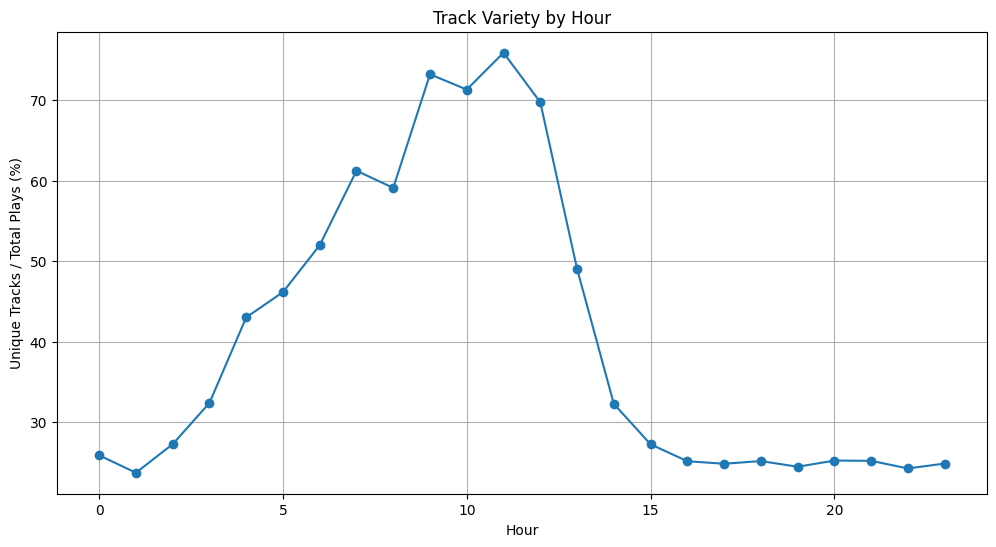

In [45]:
query = """
WITH hourly_unique AS (
    SELECT 
        hour,
        COUNT(DISTINCT master_metadata_track_name) as unique_tracks,
        COUNT(DISTINCT master_metadata_album_artist_name) as unique_artists,
        COUNT(*) as total_plays
    FROM listening_history
    WHERE year > 2013 AND year < 2025
    GROUP BY hour
)
SELECT 
    hour,
    unique_tracks,
    unique_artists,
    ROUND(CAST(unique_tracks AS FLOAT) / total_plays * 100, 2) as track_variety_score
FROM hourly_unique
ORDER BY hour;
"""

df = pd.read_sql_query(query, conn)

plt.figure(figsize=(12, 6))
plt.plot(df['hour'], df['track_variety_score'], marker='o')
plt.title('Track Variety by Hour')
plt.xlabel('Hour')
plt.ylabel('Unique Tracks / Total Plays (%)')
plt.grid(True)
plt.show()

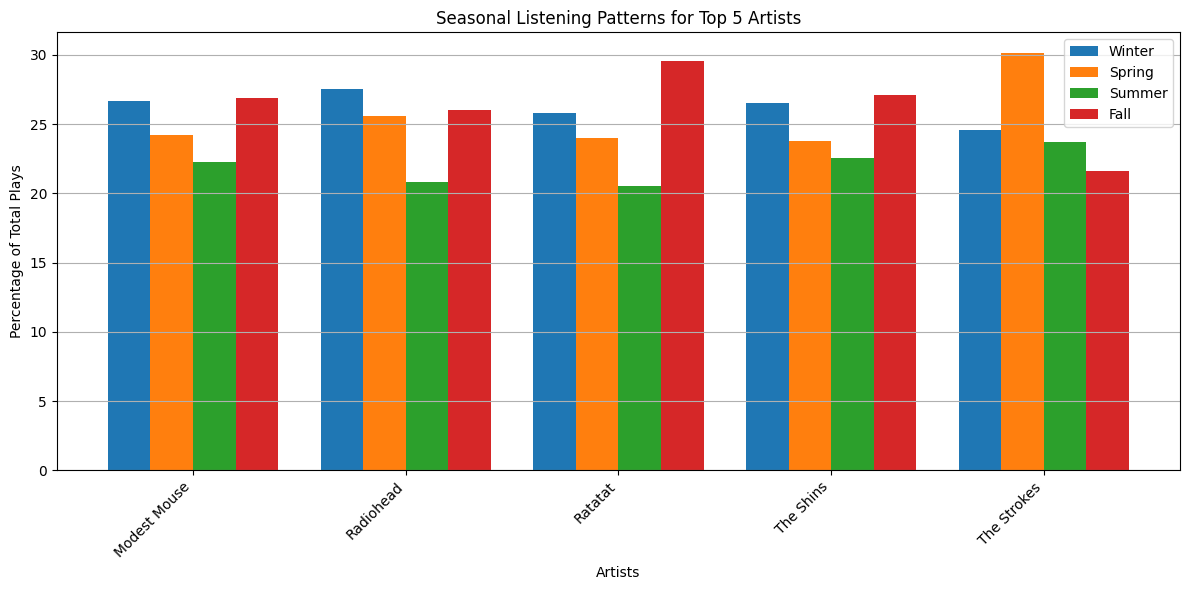

In [57]:
query = """
WITH seasonal_plays AS (
   SELECT 
       master_metadata_album_artist_name as artist,
       CASE 
           WHEN month IN (12,1,2) THEN 'Winter'
           WHEN month IN (3,4,5) THEN 'Spring'
           WHEN month IN (6,7,8) THEN 'Summer'
           ELSE 'Fall'
       END as season,
       COUNT(*) as plays
   FROM listening_history
   WHERE year > 2013 AND year < 2025
   GROUP BY artist, season
   HAVING artist IN (
       SELECT master_metadata_album_artist_name
       FROM listening_history
       GROUP BY master_metadata_album_artist_name
       HAVING COUNT(*) > 200
       ORDER BY COUNT(*) DESC
       LIMIT 5
   )
)
SELECT 
   artist,
   season,
   plays,
   ROUND(plays * 100.0 / SUM(plays) OVER (PARTITION BY artist), 2) as season_percentage
FROM seasonal_plays
ORDER BY artist, season;
"""

df = pd.read_sql_query(query, conn)

plt.figure(figsize=(12, 6))
artists = df['artist'].unique()
seasons = ['Winter', 'Spring', 'Summer', 'Fall']
x = np.arange(len(artists))
width = 0.2

for i, season in enumerate(seasons):
   season_data = df[df['season'] == season]
   plt.bar(x + i*width, season_data['season_percentage'], width, label=season)

plt.xlabel('Artists')
plt.ylabel('Percentage of Total Plays')
plt.title('Seasonal Listening Patterns for Top 5 Artists')
plt.xticks(x + width*1.5, artists, rotation=45, ha='right')
plt.legend()
plt.grid(True, axis='y')
plt.tight_layout()
plt.show() 

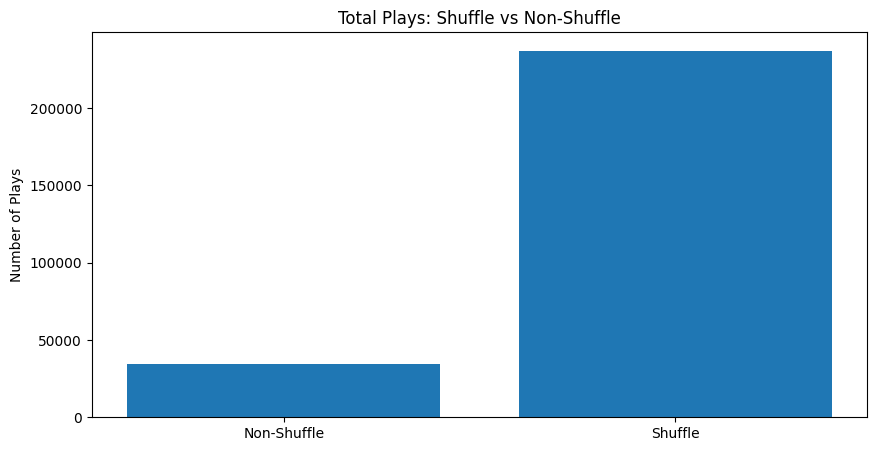

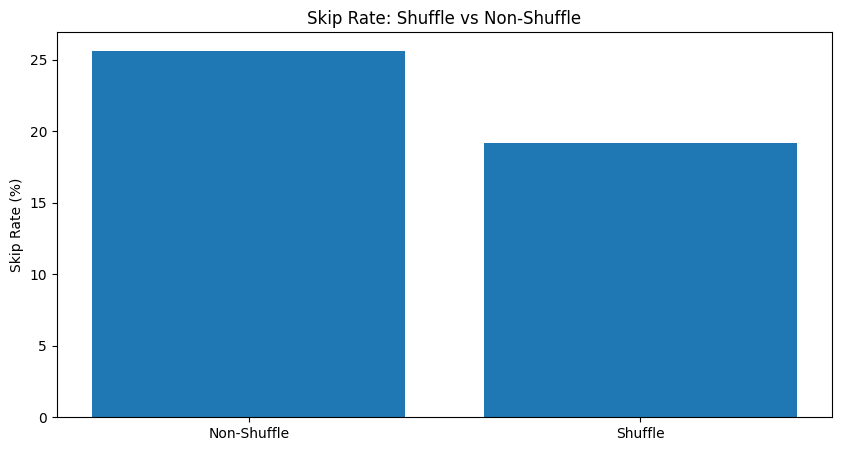

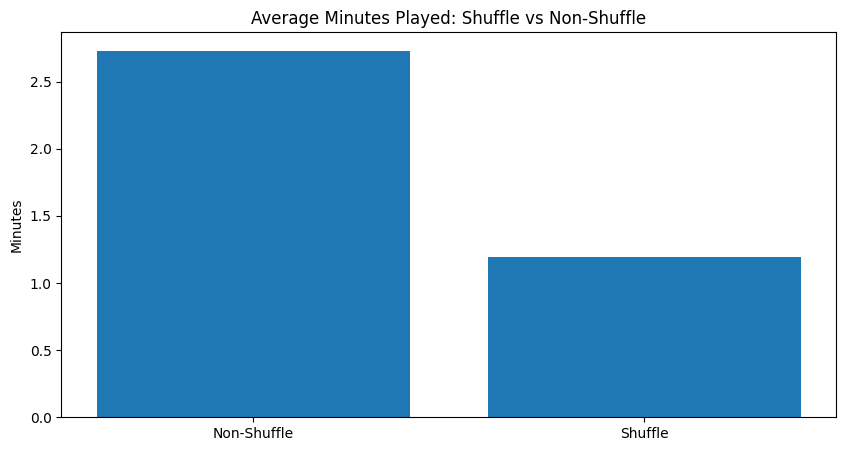

In [59]:
query = """
SELECT 
    CASE WHEN shuffle THEN 'Shuffle' ELSE 'Non-Shuffle' END as play_mode,
    COUNT(*) as plays,
    ROUND(AVG(CASE WHEN skipped THEN 1 ELSE 0 END) * 100, 2) as skip_rate,
    ROUND(AVG(minutes_played), 2) as avg_minutes_played
FROM listening_history
WHERE year > 2013 AND year < 2025
GROUP BY shuffle;
"""

df = pd.read_sql_query(query, conn)

# Simple bar plot comparing total plays
plt.figure(figsize=(10, 5))
plt.bar(df['play_mode'], df['plays'])
plt.title('Total Plays: Shuffle vs Non-Shuffle')
plt.ylabel('Number of Plays')
plt.show()

# Skip rate comparison
plt.figure(figsize=(10, 5))
plt.bar(df['play_mode'], df['skip_rate'])
plt.title('Skip Rate: Shuffle vs Non-Shuffle')
plt.ylabel('Skip Rate (%)')
plt.show()

# Average listening time
plt.figure(figsize=(10, 5))
plt.bar(df['play_mode'], df['avg_minutes_played'])
plt.title('Average Minutes Played: Shuffle vs Non-Shuffle')
plt.ylabel('Minutes')
plt.show()

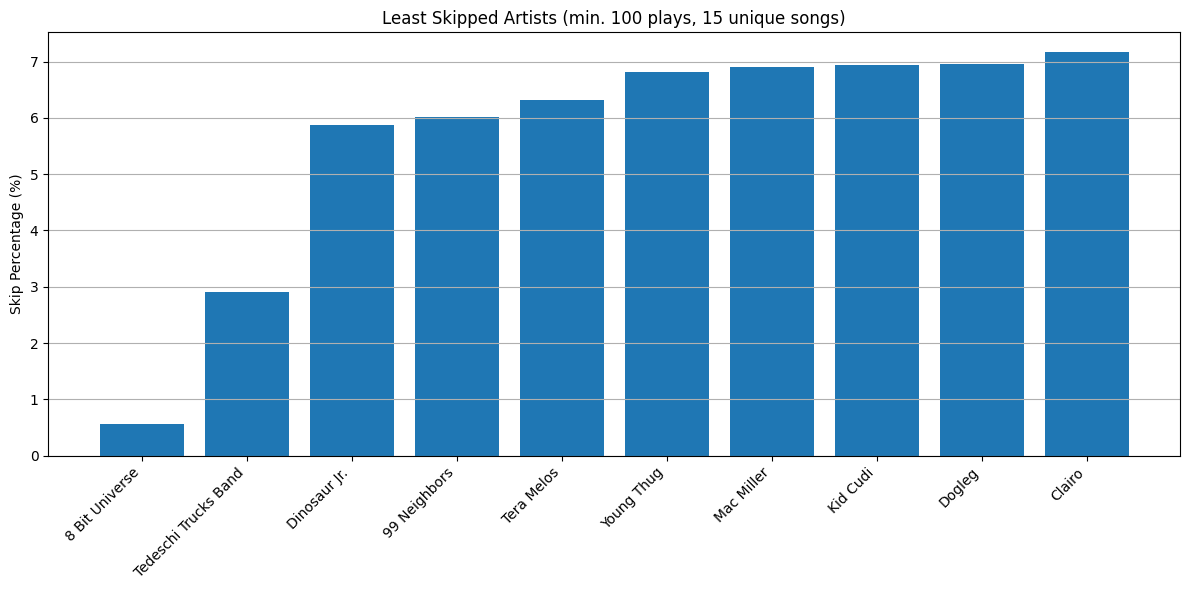

In [115]:
query = """
WITH artist_song_counts AS (
   SELECT 
       master_metadata_album_artist_name as artist,
       COUNT(DISTINCT master_metadata_track_name) as unique_songs
   FROM listening_history
   GROUP BY artist
)
SELECT 
   h.master_metadata_album_artist_name as artist,
   COUNT(*) as total_plays,
   SUM(CASE WHEN skipped THEN 1 ELSE 0 END) as total_skips,
   ROUND(CAST(SUM(CASE WHEN skipped THEN 1 ELSE 0 END) AS FLOAT) / COUNT(*) * 100, 2) as skip_percentage,
   asc.unique_songs
FROM listening_history h
JOIN artist_song_counts asc ON h.master_metadata_album_artist_name = asc.artist
WHERE year > 2013 AND year < 2025
   AND h.master_metadata_album_artist_name IS NOT NULL
GROUP BY h.master_metadata_album_artist_name
HAVING total_plays > 100 AND asc.unique_songs >= 15
ORDER BY skip_percentage ASC
LIMIT 10;
"""

df = pd.read_sql_query(query, conn)

plt.figure(figsize=(12, 6))
bars = plt.bar(range(len(df)), df['skip_percentage'])
plt.xticks(range(len(df)), df['artist'], rotation=45, ha='right')
plt.title('Least Skipped Artists (min. 100 plays, 15 unique songs)')
plt.ylabel('Skip Percentage (%)')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

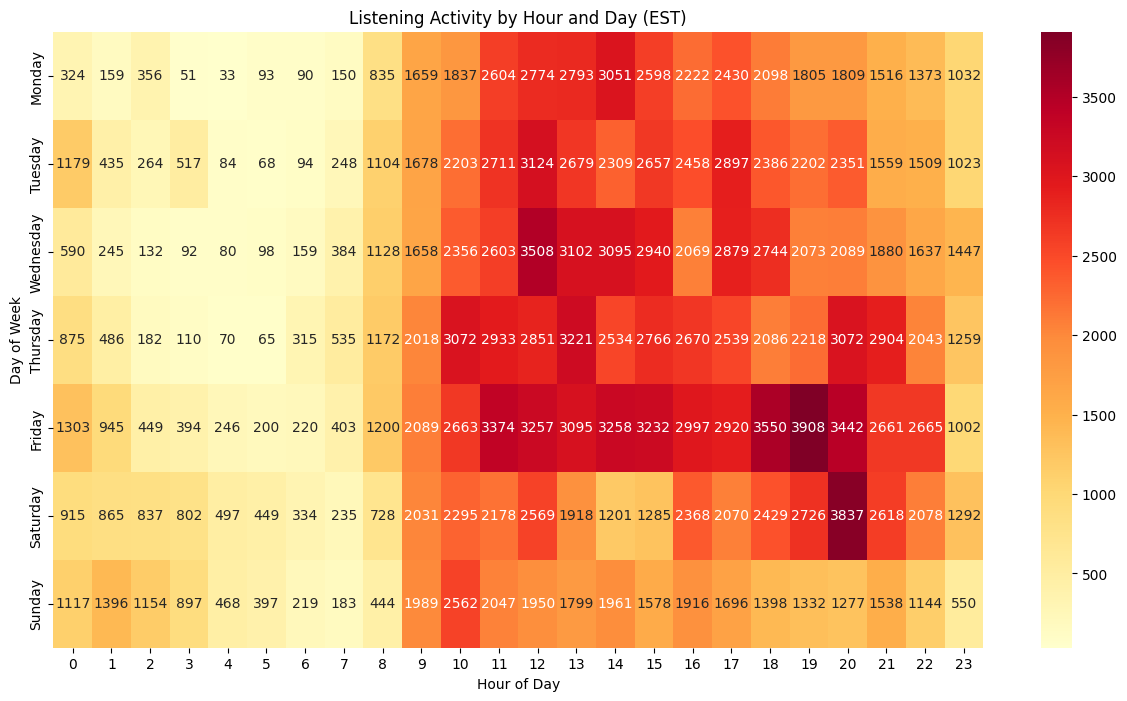

In [65]:
query = """
SELECT 
    CAST(strftime('%w', datetime(ts, '-5 hours')) AS INTEGER) as day_num,
    CAST(strftime('%H', datetime(ts, '-5 hours')) AS INTEGER) as hour,
    COUNT(*) as play_count
FROM listening_history
WHERE year > 2013 AND year < 2025
GROUP BY day_num, hour
ORDER BY day_num, hour;
"""

df = pd.read_sql_query(query, conn)
days = {0:'Sunday', 1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday'}
df['day'] = df['day_num'].map(days)
pivot_table = df.pivot(index='day', columns='hour', values='play_count')
pivot_table = pivot_table.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(15, 8))
sns.heatmap(pivot_table, cmap='YlOrRd', annot=True, fmt='g')
plt.title('Listening Activity by Hour and Day (EST)')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()

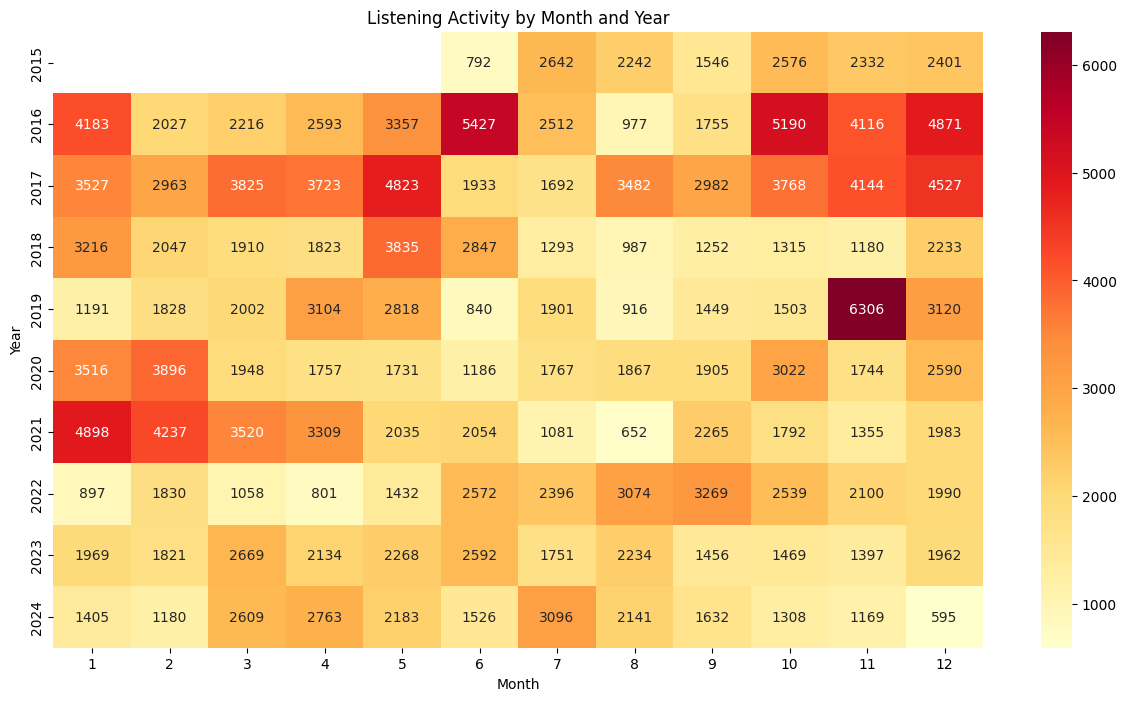

In [67]:
query = """
SELECT 
    year,
    month,
    COUNT(*) as play_count
FROM listening_history
WHERE year > 2013 AND year < 2025
GROUP BY year, month
ORDER BY year, month;
"""

df = pd.read_sql_query(query, conn)
pivot_table = df.pivot(index='year', columns='month', values='play_count')

plt.figure(figsize=(15, 8))
sns.heatmap(pivot_table, cmap='YlOrRd', annot=True, fmt='g')
plt.title('Listening Activity by Month and Year')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

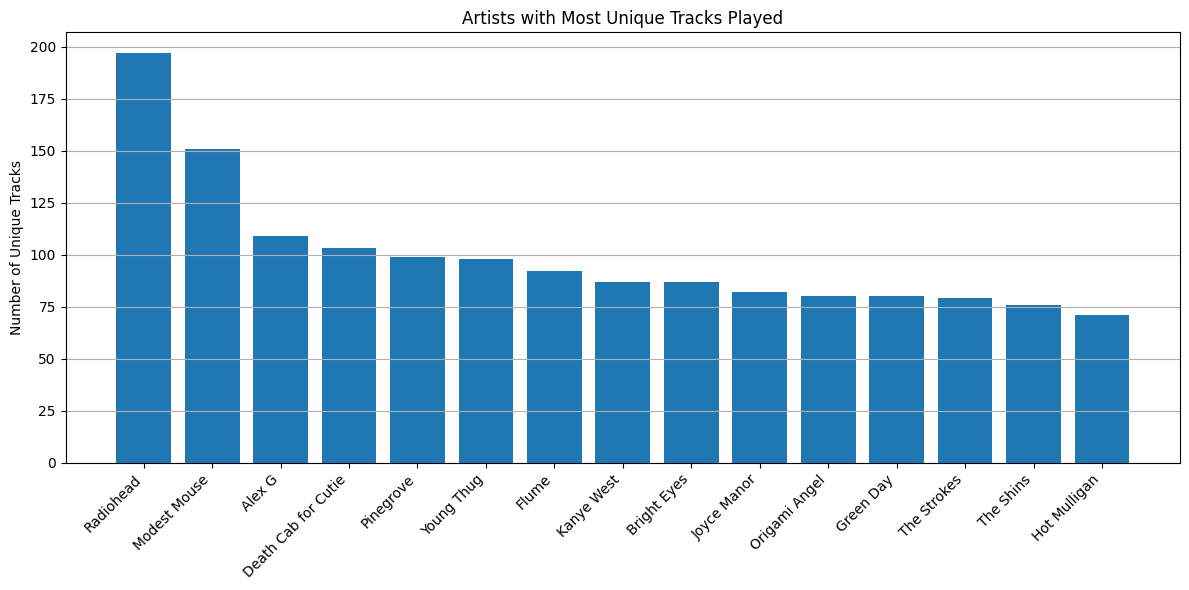

In [71]:
query = """
SELECT 
   master_metadata_album_artist_name as artist,
   COUNT(DISTINCT master_metadata_track_name) as unique_tracks,
   COUNT(*) as total_plays
FROM listening_history
WHERE master_metadata_album_artist_name IS NOT NULL
   AND master_metadata_album_artist_name != '8 Bit Universe'
GROUP BY artist
ORDER BY unique_tracks DESC
LIMIT 15;
"""

df = pd.read_sql_query(query, conn)

plt.figure(figsize=(12, 6))
plt.bar(range(len(df)), df['unique_tracks'])
plt.xticks(range(len(df)), df['artist'], rotation=45, ha='right')
plt.title('Artists with Most Unique Tracks Played')
plt.ylabel('Number of Unique Tracks')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

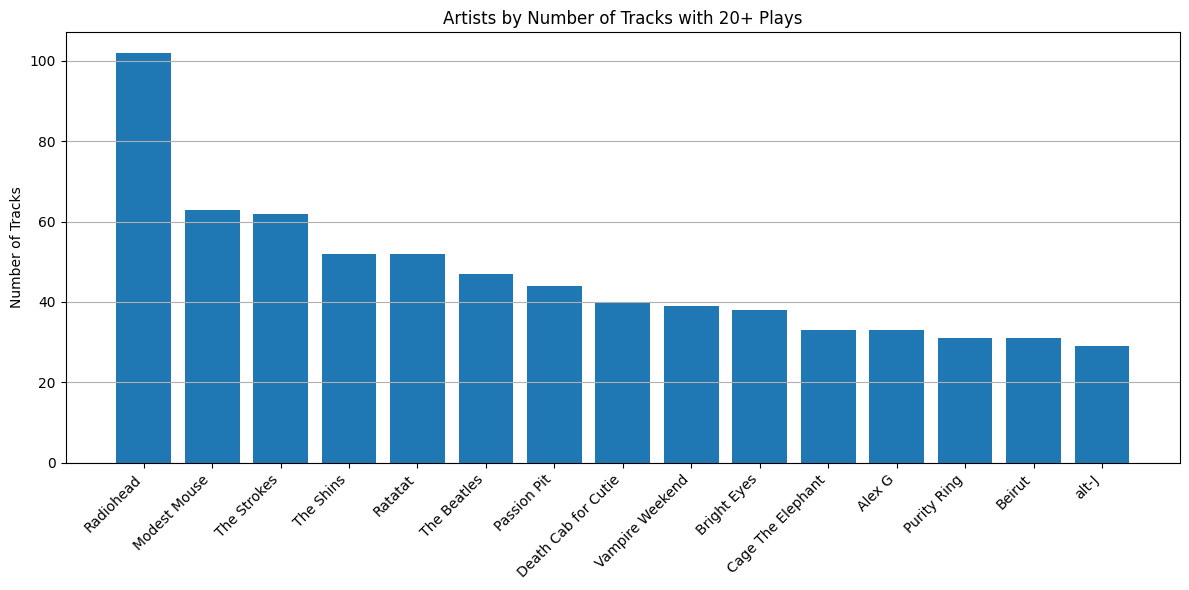

In [81]:
query = """
WITH track_counts AS (
   SELECT 
       master_metadata_album_artist_name as artist,
       master_metadata_track_name as track,
       COUNT(*) as play_count
   FROM listening_history
   WHERE master_metadata_album_artist_name IS NOT NULL
   GROUP BY artist, track
   HAVING play_count >= 20
)
SELECT 
   artist,
   COUNT(*) as tracks_over_20_plays,
   SUM(play_count) as total_plays
FROM track_counts
GROUP BY artist
ORDER BY tracks_over_20_plays DESC
LIMIT 15;
"""

df = pd.read_sql_query(query, conn)

plt.figure(figsize=(12, 6))
plt.bar(range(len(df)), df['tracks_over_20_plays'])
plt.xticks(range(len(df)), df['artist'], rotation=45, ha='right')
plt.title('Artists by Number of Tracks with 20+ Plays')
plt.ylabel('Number of Tracks')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

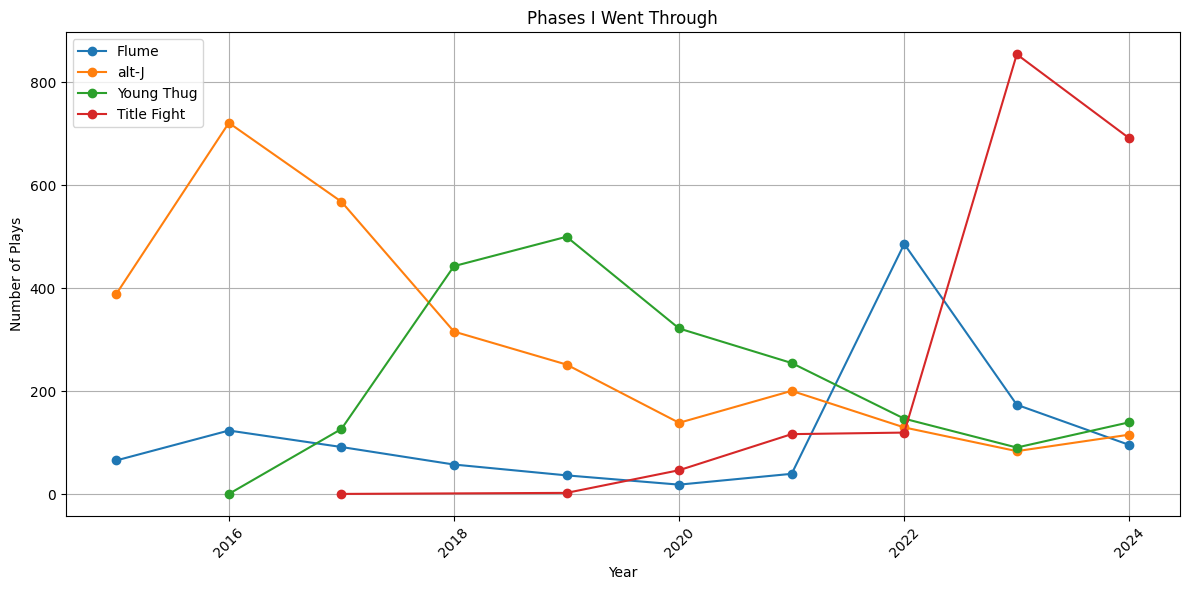

In [102]:
query = """
WITH artist_counts AS (
   SELECT 
       year,
       master_metadata_album_artist_name,
       COUNT(*) as plays
   FROM listening_history 
   WHERE year > 2013 AND year < 2025
   GROUP BY year, master_metadata_album_artist_name
)
SELECT year, master_metadata_album_artist_name, plays
FROM artist_counts
WHERE master_metadata_album_artist_name IN (
   SELECT master_metadata_album_artist_name 
   FROM listening_history
   WHERE master_metadata_album_artist_name = 'alt-J' OR
       master_metadata_album_artist_name = 'Flume' OR
       master_metadata_album_artist_name = 'Young Thug' OR
       master_metadata_album_artist_name = 'Title Fight'
   GROUP BY master_metadata_album_artist_name
   ORDER BY COUNT(*) DESC
)
ORDER BY year;
"""

df = pd.read_sql_query(query, conn)

plt.figure(figsize=(12, 6))
for artist in df['master_metadata_album_artist_name'].unique():
   artist_data = df[df['master_metadata_album_artist_name'] == artist]
   plt.plot(artist_data['year'], artist_data['plays'], marker='o', label=artist)

plt.title('Phases I Went Through')
plt.xlabel('Year')
plt.ylabel('Number of Plays')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

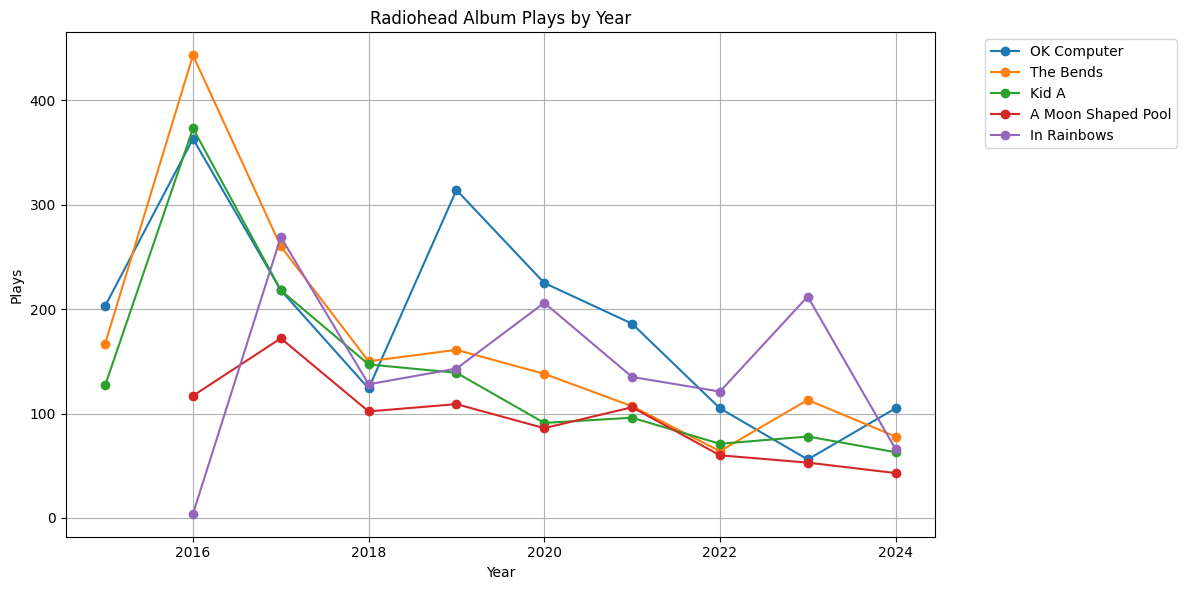

In [105]:
query = """
SELECT 
   master_metadata_album_album_name as album,
   year,
   COUNT(*) as plays
FROM listening_history
WHERE master_metadata_album_artist_name = 'Radiohead'
   AND master_metadata_album_album_name IN (
       SELECT master_metadata_album_album_name
       FROM listening_history
       WHERE master_metadata_album_artist_name = 'Radiohead'
       GROUP BY master_metadata_album_album_name
       ORDER BY COUNT(*) DESC
       LIMIT 5
   )
   AND year > 2013 AND year < 2025
GROUP BY album, year
ORDER BY year, plays DESC;
"""

df = pd.read_sql_query(query, conn)

plt.figure(figsize=(12, 6))
for album in df['album'].unique():
   album_data = df[df['album'] == album]
   plt.plot(album_data['year'], album_data['plays'], marker='o', label=album)

plt.title('Radiohead Album Plays by Year')
plt.xlabel('Year')
plt.ylabel('Plays')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [107]:
query = """
SELECT 
   master_metadata_album_album_name as album,
   COUNT(*) as total_plays,
   COUNT(DISTINCT master_metadata_track_name) as unique_tracks,
   ROUND(AVG(minutes_played), 2) as avg_minutes_per_play
FROM listening_history
WHERE master_metadata_album_artist_name = 'Radiohead'
GROUP BY album
ORDER BY total_plays DESC
LIMIT 10;
"""

df = pd.read_sql_query(query, conn)
print(df.to_string(index=False))

                        album  total_plays  unique_tracks  avg_minutes_per_play
                  OK Computer         1905             13                  1.39
                    The Bends         1686             14                  1.53
                        Kid A         1404             13                  1.46
                  In Rainbows         1285             18                  2.52
           A Moon Shaped Pool          853             11                  1.49
                     Amnesiac          641             17                  0.77
OK Computer OKNOTOK 1997 2017          628             23                  1.54
                  Pablo Honey          480              6                  0.42
            The King Of Limbs          475              8                  0.80
            Hail To the Thief          421             15                  1.16


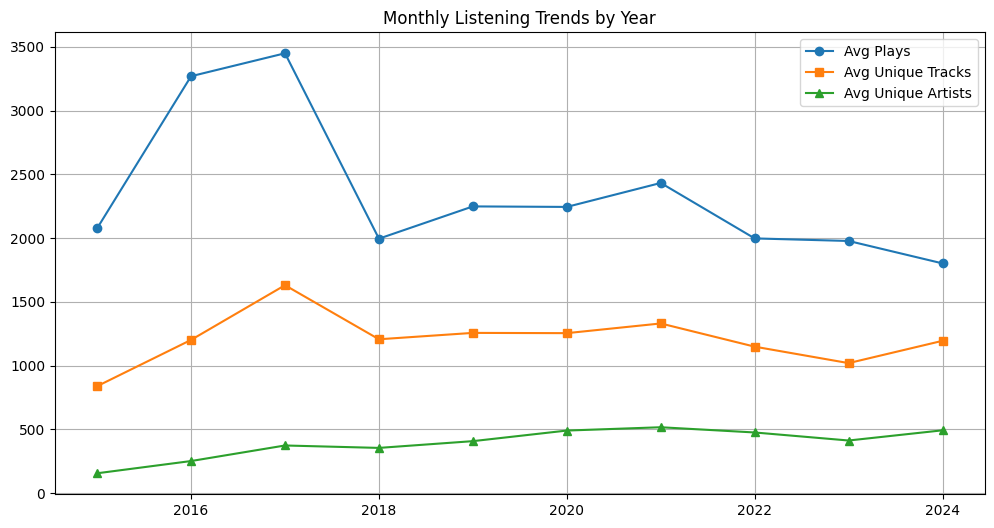

In [109]:
query = """
WITH monthly_stats AS (
    SELECT 
        year,
        month,
        COUNT(DISTINCT master_metadata_album_artist_name) as unique_artists,
        COUNT(DISTINCT master_metadata_track_name) as unique_tracks,
        COUNT(*) as total_plays
    FROM listening_history
    WHERE year > 2013 AND year < 2025
    GROUP BY year, month
)
SELECT 
    year,
    ROUND(AVG(unique_artists)) as avg_artists_per_month,
    ROUND(AVG(unique_tracks)) as avg_tracks_per_month,
    ROUND(AVG(total_plays)) as avg_plays_per_month
FROM monthly_stats
GROUP BY year
ORDER BY year;
"""

df = pd.read_sql_query(query, conn)

plt.figure(figsize=(12, 6))
plt.plot(df['year'], df['avg_plays_per_month'], marker='o', label='Avg Plays')
plt.plot(df['year'], df['avg_tracks_per_month'], marker='s', label='Avg Unique Tracks')
plt.plot(df['year'], df['avg_artists_per_month'], marker='^', label='Avg Unique Artists')
plt.title('Monthly Listening Trends by Year')
plt.legend()
plt.grid(True)
plt.show()

In [114]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

query = """
WITH artist_metrics AS (
   SELECT 
       master_metadata_album_artist_name as artist,
       COUNT(*) as total_plays,
       COUNT(DISTINCT master_metadata_track_name) as unique_tracks,
       COUNT(DISTINCT strftime('%Y-%m', ts)) as active_months,
       MAX(ts) as last_played
   FROM listening_history
   WHERE master_metadata_album_artist_name IS NOT NULL
       AND master_metadata_album_artist_name != 'Various Artists'
   GROUP BY artist
   HAVING total_plays >= 100
)
SELECT 
   artist,
   total_plays,
   unique_tracks,
   active_months,
   ROUND(CAST(total_plays AS FLOAT) / active_months, 2) as plays_per_month
FROM artist_metrics
ORDER BY plays_per_month DESC
LIMIT 10;
"""

print('\nMost Consistently Played Artists')
df = pd.read_sql_query(query, conn)
df


Most Consistently Played Artists


,artist,total_plays,unique_tracks,active_months,plays_per_month
0,Radiohead,10839,197,117,92.64
1,The Strokes,7890,79,115,68.61
2,Hot Mulligan,1601,71,30,53.37
3,Modest Mouse,5997,151,116,51.70
4,Ratatat,5111,67,115,44.44
5,The Shins,4032,76,116,34.76
6,Passion Pit,4023,47,116,34.68
7,Death Cab for Cutie,3799,103,116,32.75
8,Bright Eyes,3610,87,116,31.12
9,Title Fight,1834,52,59,31.08
